In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


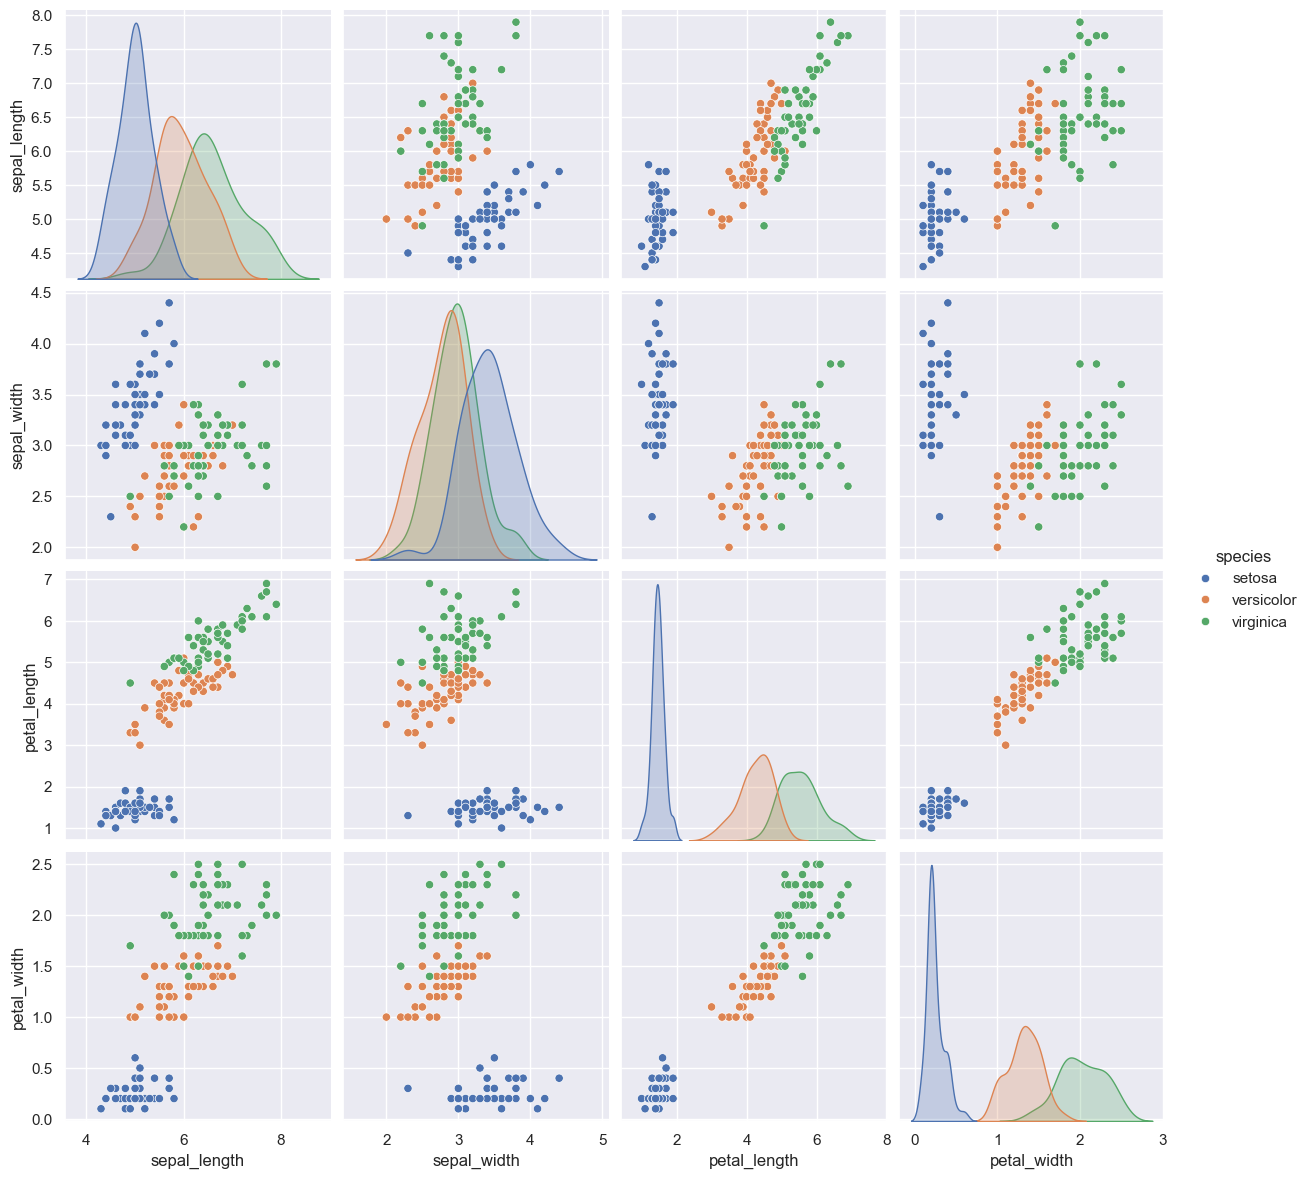

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=3);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

(150,)

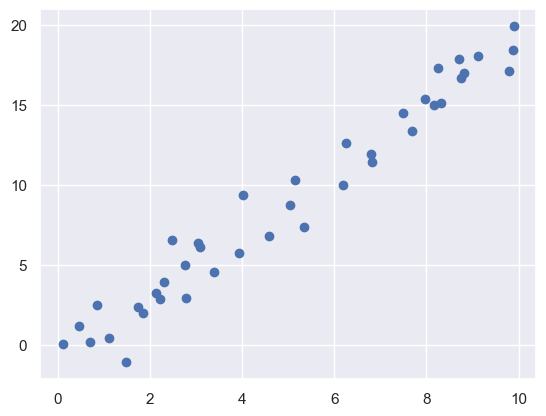

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);

In [11]:
import numpy as np
from sklearn.preprocessing import SplineTransformer

X = np.arange(5).reshape(5, 1)
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=["a", "b", "c"])
scalar = StandardScaler().fit(X)
scalar.feature_names_in_

array(['a', 'b', 'c'], dtype=object)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

X = pd.DataFrame({"pet": ["dog", "cat", "fish"], "age": [3, 7, 1]})
preprocessor = ColumnTransformer(
    [
        ("numerical", StandardScaler(), ["age"]),
        ("categorical", OneHotEncoder(), ["pet"]),
    ],
    verbose_feature_names_out=False,
).fit(X)

preprocessor.get_feature_names_out()

array(['age', 'pet_cat', 'pet_dog', 'pet_fish'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X = np.array(
    [["dog"] * 5 + ["cat"] * 20 + ["rabbit"] * 10 + ["snake"] * 3], dtype=object
).T
enc = OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [17]:
encoded = enc.transform(np.array([["dog"], ["snake"], ["cat"], ["rabbit"]]))
pd.DataFrame(encoded, columns=enc.get_feature_names_out())

,x0_cat,x0_rabbit,x0_infrequent_sklearn
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0


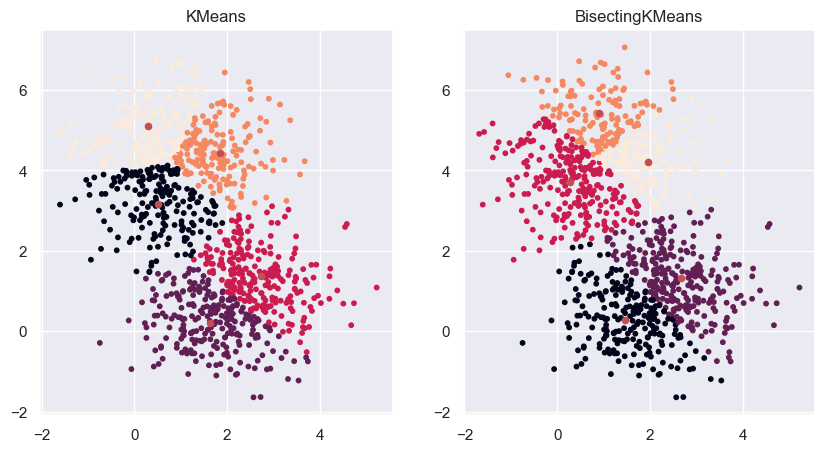

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, BisectingKMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=1000, centers=2, random_state=0)

km = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
bisect_km = BisectingKMeans(n_clusters=5, random_state=0).fit(X)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)
ax[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=20, c="r")
ax[0].set_title("KMeans")

ax[1].scatter(X[:, 0], X[:, 1], s=10, c=bisect_km.labels_)
ax[1].scatter(
    bisect_km.cluster_centers_[:, 0], bisect_km.cluster_centers_[:, 1], s=20, c="r"
)
_ = ax[1].set_title("BisectingKMeans")

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

X, y = load_iris(as_frame=True, return_X_y=True)
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


In [22]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor

X, y = load_diabetes(return_X_y=True, as_frame=True)

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
)
hist_no_interact.fit(X, y)

HistGradientBoostingRegressor(interaction_cst=[[0], [1], [2], [3], [4], [5],
                                               [6], [7], [8], [9]],
                              random_state=0)

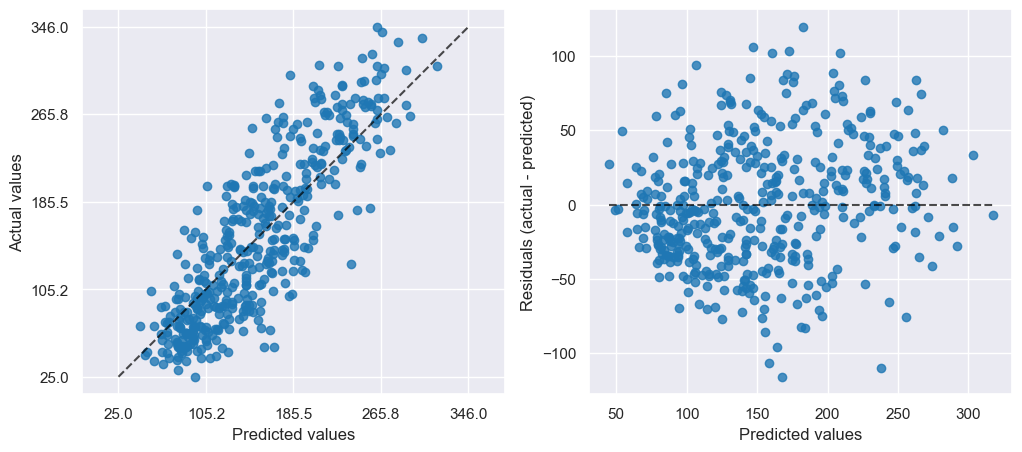

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="residual_vs_predicted", ax=axs[1]
)

In [25]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
X = X.select_dtypes(["number", "category"]).drop(columns=["body"])

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(
    ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), categorical_features)],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(random_state=0),
).fit(X, y)

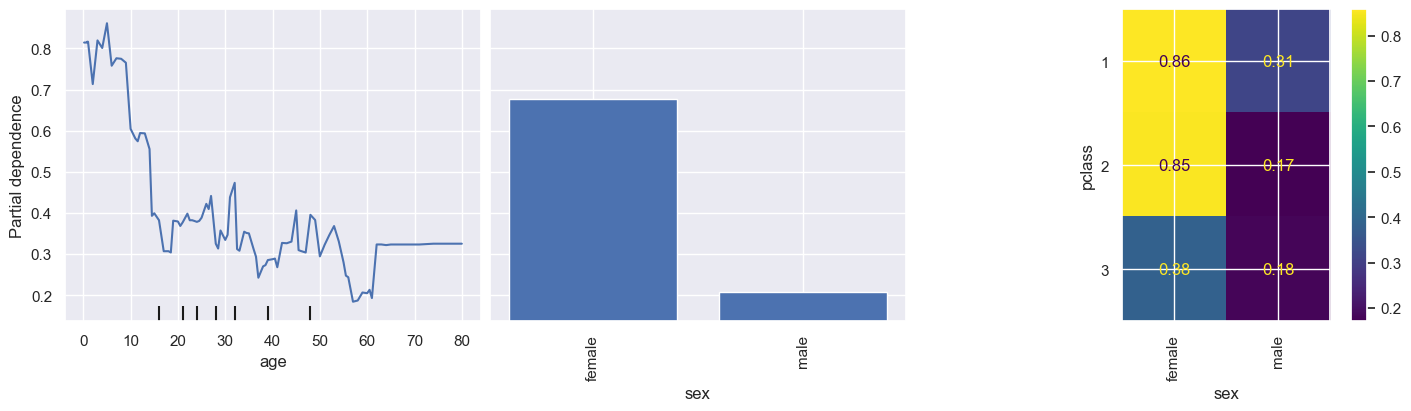

In [27]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
_ = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["age", "sex", ("pclass", "sex")],
    categorical_features=categorical_features,
    ax=ax,
)